### Evaluating customer conversion rate 
**This analysis looks at the success rate of a bank's campaign to sign in term-deposit clients. Using it to predict the likelihood of existing clients signing in to the product in the future**

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code"></form>''')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("bank.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

<AxesSubplot:ylabel='deposit'>

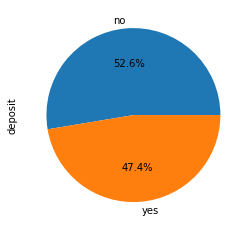

In [6]:
df['deposit'].value_counts(normalize=True).plot.pie(labels=['no','yes'],autopct='%1.1f%%')

In [144]:
#df.marital.value_counts()

In [145]:
#df.education.value_counts()

In [146]:
#df.job.value_counts()

In [147]:
#df.contact.value_counts()

In [148]:
#df.poutcome.value_counts()

In [149]:
#df[df["poutcome"] == "success"]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### Create dummy variables

In [8]:
job_dummies = pd.get_dummies(df["job"], prefix = "job = ")
df = pd.concat([df, job_dummies], axis=1)
df = df.drop("job", axis = 1)

marital_dummies = pd.get_dummies(df["marital"], prefix = "marital_status = ")
df = pd.concat([df, marital_dummies], axis=1)
df = df.drop("marital", axis = 1)

education_dummies = pd.get_dummies(df["education"], prefix = "education = ")
df = pd.concat([df, education_dummies], axis=1)
df = df.drop("education", axis = 1)

contact_dummies = pd.get_dummies(df["contact"], prefix = "contact = ")
df = pd.concat([df, contact_dummies], axis=1)
df = df.drop("contact", axis = 1)

poutcome_dummies = pd.get_dummies(df["poutcome"], prefix = "previous_outcome = ")
df = pd.concat([df, poutcome_dummies], axis=1)
df = df.drop("poutcome", axis = 1)
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education = _secondary,education = _tertiary,education = _unknown,contact = _cellular,contact = _telephone,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown
0,59,no,2343,yes,no,5,may,1042,1,-1,...,1,0,0,0,0,1,0,0,0,1
1,56,no,45,no,no,5,may,1467,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,41,no,1270,yes,no,5,may,1389,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,55,no,2476,yes,no,5,may,579,1,-1,...,1,0,0,0,0,1,0,0,0,1
4,54,no,184,no,no,5,may,673,2,-1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,no,1,yes,no,20,apr,257,1,-1,...,0,0,0,1,0,0,0,0,0,1
11158,39,no,733,no,no,16,jun,83,4,-1,...,1,0,0,0,0,1,0,0,0,1
11159,32,no,29,no,no,19,aug,156,2,-1,...,1,0,0,1,0,0,0,0,0,1
11160,43,no,0,no,yes,8,may,9,2,172,...,1,0,0,1,0,0,1,0,0,0


### Transform default/housing/loan/deposit variables to 0 and 1

In [9]:
from sklearn.preprocessing import LabelEncoder

credit_default = LabelEncoder()
credit_default.fit(df["default"])

df["credit_default"] = credit_default.transform(df["default"])
df = df.drop("default", axis = 1)


house_loan = LabelEncoder()
house_loan.fit(df["housing"])

df["house_loan"] = house_loan.transform(df["housing"])
df = df.drop("housing", axis = 1)


personal_loan = LabelEncoder()
personal_loan.fit(df["loan"])

df["personal_loan"] = personal_loan.transform(df["loan"])
df = df.drop("loan", axis = 1)


term_deposit = LabelEncoder()
term_deposit.fit(df["deposit"])

df["term_deposit"] = term_deposit.transform(df["deposit"])
df = df.drop("deposit", axis = 1)
df

,age,balance,day,month,duration,campaign,pdays,previous,job = _admin.,job = _blue-collar,...,contact = _telephone,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown,credit_default,house_loan,personal_loan,term_deposit
0,59,2343,5,may,1042,1,-1,0,1,0,...,0,1,0,0,0,1,0,1,0,1
1,56,45,5,may,1467,1,-1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
2,41,1270,5,may,1389,1,-1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
3,55,2476,5,may,579,1,-1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
4,54,184,5,may,673,2,-1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,apr,257,1,-1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
11158,39,733,16,jun,83,4,-1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
11159,32,29,19,aug,156,2,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11160,43,0,8,may,9,2,172,5,0,0,...,0,0,1,0,0,0,0,0,1,0


### Change 'month' into numeric (int)

In [10]:
month_dict = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}

for idx, row in df.iterrows():
    month = row["month"]
    df.loc[idx, "month_v2"] = month_dict[month]

In [11]:
df["month_v2"] = df["month_v2"].astype(int)

In [12]:
df

,age,balance,day,month,duration,campaign,pdays,previous,job = _admin.,job = _blue-collar,...,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown,credit_default,house_loan,personal_loan,term_deposit,month_v2
0,59,2343,5,may,1042,1,-1,0,1,0,...,1,0,0,0,1,0,1,0,1,5
1,56,45,5,may,1467,1,-1,0,1,0,...,1,0,0,0,1,0,0,0,1,5
2,41,1270,5,may,1389,1,-1,0,0,0,...,1,0,0,0,1,0,1,0,1,5
3,55,2476,5,may,579,1,-1,0,0,0,...,1,0,0,0,1,0,1,0,1,5
4,54,184,5,may,673,2,-1,0,1,0,...,1,0,0,0,1,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,apr,257,1,-1,0,0,1,...,0,0,0,0,1,0,1,0,0,4
11158,39,733,16,jun,83,4,-1,0,0,0,...,1,0,0,0,1,0,0,0,0,6
11159,32,29,19,aug,156,2,-1,0,0,0,...,0,0,0,0,1,0,0,0,0,8
11160,43,0,8,may,9,2,172,5,0,0,...,0,1,0,0,0,0,0,1,0,5


### Drop initial 'month' column

In [13]:
df = df.drop("month", axis = 1)
df

,age,balance,day,duration,campaign,pdays,previous,job = _admin.,job = _blue-collar,job = _entrepreneur,...,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown,credit_default,house_loan,personal_loan,term_deposit,month_v2
0,59,2343,5,1042,1,-1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,5
1,56,45,5,1467,1,-1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,5
2,41,1270,5,1389,1,-1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,5
3,55,2476,5,579,1,-1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,5
4,54,184,5,673,2,-1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,4
11158,39,733,16,83,4,-1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,6
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8
11160,43,0,8,9,2,172,5,0,0,0,...,0,1,0,0,0,0,0,1,0,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          11162 non-null  int64
 1   balance                      11162 non-null  int64
 2   day                          11162 non-null  int64
 3   duration                     11162 non-null  int64
 4   campaign                     11162 non-null  int64
 5   pdays                        11162 non-null  int64
 6   previous                     11162 non-null  int64
 7   job = _admin.                11162 non-null  uint8
 8   job = _blue-collar           11162 non-null  uint8
 9   job = _entrepreneur          11162 non-null  uint8
 10  job = _housemaid             11162 non-null  uint8
 11  job = _management            11162 non-null  uint8
 12  job = _retired               11162 non-null  uint8
 13  job = _self-employed         11162 non-null  u

In [15]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,job = _admin.,job = _blue-collar,job = _entrepreneur,...,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown,credit_default,house_loan,personal_loan,term_deposit,month_v2
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.119513,0.174162,0.029385,...,0.210177,0.110016,0.048110,0.095951,0.745924,0.015051,0.473123,0.130801,0.473840,6.190826
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.324405,0.379266,0.168892,...,0.407453,0.312924,0.214008,0.294537,0.435360,0.121761,0.499299,0.337198,0.499338,2.572792
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,8.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000


### Check for correlation among variables

In [16]:
corrMatrix = df.corr()
corrMatrix

,age,balance,day,duration,campaign,pdays,previous,job = _admin.,job = _blue-collar,job = _entrepreneur,...,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown,credit_default,house_loan,personal_loan,term_deposit,month_v2
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169,-0.057458,-0.066567,0.024176,...,-0.037860,-0.008071,-0.018715,0.062114,-0.027021,-0.011425,-0.168700,-0.031418,0.034901,0.069312
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805,-0.038001,-0.046220,0.005039,...,-0.046237,0.001695,0.028521,0.045603,-0.046091,-0.060954,-0.077092,-0.084589,0.081129,0.063818
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.013901,-0.023039,-0.004463,...,0.003401,-0.068381,-0.007526,-0.044280,0.082807,0.017342,-0.014770,0.017269,-0.056326,0.060431
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,-0.025542,0.029986,-0.000908,...,-0.013107,-0.033966,-0.008782,-0.022578,0.044006,-0.009760,0.035051,-0.001914,0.451919,0.005390
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.017881,0.005522,0.013883,...,0.045016,-0.080188,-0.023689,-0.091807,0.131392,0.030975,0.006660,0.034722,-0.128081,0.039251
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.044068,-0.030695,-0.029732,...,-0.230944,0.602615,0.341404,0.329567,-0.823928,-0.036282,0.064497,-0.030416,0.151593,-0.035375
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.022699,-0.039939,-0.022470,...,-0.178947,0.335870,0.326587,0.325477,-0.622149,-0.035273,-0.000840,-0.022668,0.139867,-0.002695
job = _admin.,-0.057458,-0.038001,-0.013901,-0.025542,-0.017881,0.044068,0.022699,1.000000,-0.169190,-0.064104,...,-0.001611,0.033750,0.007513,0.005628,-0.031759,-0.020592,0.060213,0.050383,-0.000610,-0.025824
job = _blue-collar,-0.066567,-0.046220,-0.023039,0.029986,0.005522,-0.030695,-0.039939,-0.169190,1.000000,-0.079905,...,0.162004,-0.018022,-0.002788,-0.077422,0.066703,0.022779,0.189848,0.057956,-0.100840,-0.062436
job = _entrepreneur,0.024176,0.005039,-0.004463,-0.000908,0.013883,-0.029732,-0.022470,-0.064104,-0.079905,1.000000,...,0.018308,-0.001840,-0.024244,-0.035072,0.036967,0.022060,0.011492,0.042631,-0.034443,0.031426


**High correlation between term deposit and duration of call (0.451919)**
- Followed by previous_outcome = success (0.286642)
- contact = cellular (0.223252)
- pdays (0.151593)
- previous (0.139867)
- job = retired (0.103827)


- job = student (0.099953)
- marital_status = single (0.094632)
- education = tertiary (0.094598)
- balance (0.081129)
- previous_outcome = other (0.044059)
- age  (0.034901)
- job = management (0.036301)
- job = unemployed (0.033487)
- month (0.028645)
- previous_outcome = failure (0.020714)


### Correlation matrix with fewer varibles

In [17]:
corrMatx = df[["job = _retired", "previous", "pdays", "contact = _cellular", "previous_outcome = _success", "duration", "term_deposit"]].corr()
corrMatx

,job = _retired,previous,pdays,contact = _cellular,previous_outcome = _success,duration,term_deposit
job = _retired,1.000000,0.019384,0.004212,-0.033346,0.072092,0.014194,0.103827
previous,0.019384,1.000000,0.507272,0.147519,0.325477,-0.026716,0.139867
pdays,0.004212,0.507272,1.000000,0.205877,0.329567,-0.027392,0.151593
contact = _cellular,-0.033346,0.147519,0.205877,1.000000,0.141237,0.020938,0.223252
previous_outcome = _success,0.072092,0.325477,0.329567,0.141237,1.000000,-0.022578,0.286642
duration,0.014194,-0.026716,-0.027392,0.020938,-0.022578,1.000000,0.451919
term_deposit,0.103827,0.139867,0.151593,0.223252,0.286642,0.451919,1.000000


<AxesSubplot:>

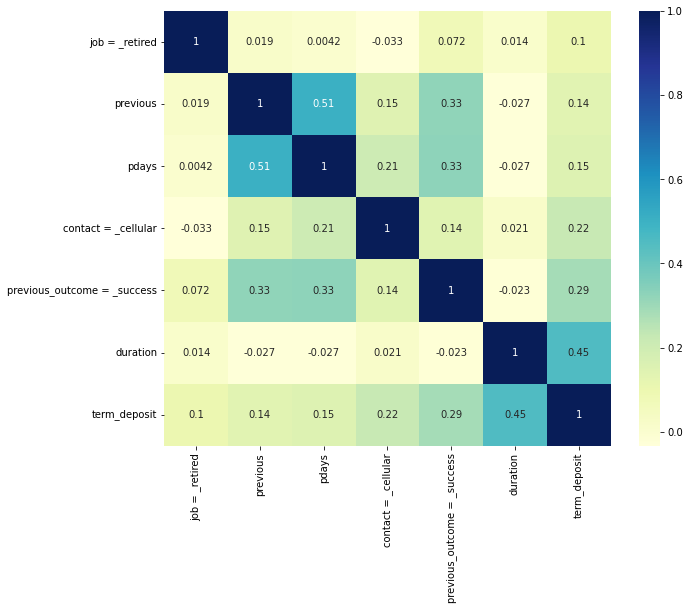

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(corrMatx, annot = True, cmap= 'YlGnBu')

### Drop the 'duration' variable

The duration variable highly affects the target variable (term_deposit). I'm dropping it in order to remove its influence on the outcome

In [19]:
df = df.drop("duration", axis = 1)
df

,age,balance,day,campaign,pdays,previous,job = _admin.,job = _blue-collar,job = _entrepreneur,job = _housemaid,...,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown,credit_default,house_loan,personal_loan,term_deposit,month_v2
0,59,2343,5,1,-1,0,1,0,0,0,...,1,0,0,0,1,0,1,0,1,5
1,56,45,5,1,-1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,5
2,41,1270,5,1,-1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,5
3,55,2476,5,1,-1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,5
4,54,184,5,2,-1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,1,-1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,4
11158,39,733,16,4,-1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,6
11159,32,29,19,2,-1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8
11160,43,0,8,2,172,5,0,0,0,0,...,0,1,0,0,0,0,0,1,0,5


### Correlation among variables, after removing 'duration'

In [20]:
corrMatx2 = df[["previous_outcome = _failure", "month_v2", "job = _unemployed", "job = _management", "age", "previous_outcome = _other", "balance", "education = _tertiary", "marital_status = _single", "job = _student", "job = _retired", "previous", "pdays", "contact = _cellular", "previous_outcome = _success", "term_deposit"]].corr()
corrMatx2

,previous_outcome = _failure,month_v2,job = _unemployed,job = _management,age,previous_outcome = _other,balance,education = _tertiary,marital_status = _single,job = _student,job = _retired,previous,pdays,contact = _cellular,previous_outcome = _success,term_deposit
previous_outcome = _failure,1.000000,-0.019513,-0.006957,0.007280,-0.008071,-0.079042,0.001695,0.012265,0.009838,0.005501,-0.014159,0.335870,0.602615,0.164764,-0.114542,0.020714
month_v2,-0.019513,1.000000,-0.029513,0.057797,0.069312,-0.032948,0.063818,0.046495,-0.064487,-0.002897,0.017031,-0.002695,-0.035375,0.106495,0.055291,0.028645
job = _unemployed,-0.006957,-0.029513,1.000000,-0.099312,-0.003582,-0.014692,-0.012050,-0.036788,0.012584,-0.033183,-0.049754,-0.001605,0.007781,0.020183,0.030678,0.033487
job = _management,0.007280,0.057797,-0.099312,1.000000,-0.046492,0.017462,0.044912,0.602002,0.018908,-0.099742,-0.149550,0.022079,0.015704,0.103077,0.033104,0.036301
age,-0.008071,0.069312,-0.003582,-0.046492,1.000000,-0.018715,0.112300,-0.101372,-0.467799,-0.231846,0.555863,0.020169,0.002774,-0.085019,0.062114,0.034901
previous_outcome = _other,-0.079042,-0.032948,-0.014692,0.017462,-0.018715,1.000000,0.028521,0.012926,0.033116,0.037158,-0.002350,0.326587,0.341404,0.090586,-0.073240,0.044059
balance,0.001695,0.063818,-0.012050,0.044912,0.112300,0.028521,1.000000,0.069128,-0.014994,-0.001571,0.075423,0.030805,0.017411,0.007816,0.045603,0.081129
education = _tertiary,0.012265,0.046495,-0.036788,0.602002,-0.101372,0.012926,0.069128,1.000000,0.121884,-0.038787,-0.087604,0.028146,0.011566,0.144361,0.059518,0.094598
marital_status = _single,0.009838,-0.064487,0.012584,0.018908,-0.467799,0.033116,-0.014994,0.121884,1.000000,0.250543,-0.166003,0.023817,0.031280,0.077069,0.023208,0.094632
job = _student,0.005501,-0.002897,-0.033183,-0.099742,-0.231846,0.037158,-0.001571,-0.038787,0.250543,1.000000,-0.049970,0.037012,0.029129,0.058339,0.055885,0.099953


<AxesSubplot:>

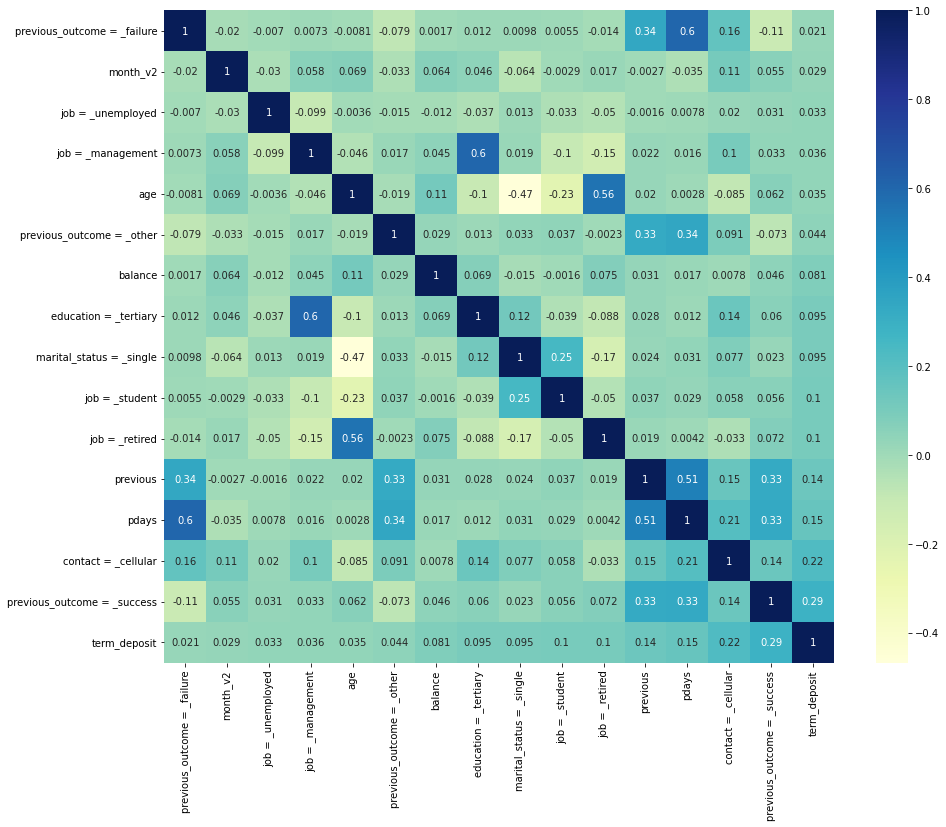

In [21]:
plt.figure(figsize=(15,12))
sns.heatmap(corrMatx2, annot = True, cmap= 'YlGnBu')

 ### Train_test split

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop("term_deposit", axis = 1)
y = df["term_deposit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
X_train

,age,balance,day,campaign,pdays,previous,job = _admin.,job = _blue-collar,job = _entrepreneur,job = _housemaid,...,contact = _telephone,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown,credit_default,house_loan,personal_loan,month_v2
3955,28,5741,10,5,200,3,0,0,0,0,...,0,0,1,0,0,0,0,0,0,9
11150,34,355,21,3,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,8
5173,48,201,10,1,91,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,11
3017,53,1961,15,1,-1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,12
2910,53,1624,11,3,97,7,0,0,0,0,...,0,0,0,0,1,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,47,761,11,2,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,7
5191,28,159,16,2,33,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,11
5390,35,1144,20,13,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,8
860,51,746,25,5,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,8


In [24]:
X_test

,age,balance,day,campaign,pdays,previous,job = _admin.,job = _blue-collar,job = _entrepreneur,job = _housemaid,...,contact = _telephone,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown,credit_default,house_loan,personal_loan,month_v2
5527,65,744,5,1,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
4541,38,1627,16,9,-1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,6
1964,35,4963,14,1,300,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,5
5007,47,8229,8,2,-1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,8
8928,35,1473,12,3,-1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,46,926,7,5,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
5544,49,230,8,1,-1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,5
10749,53,431,5,1,328,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,5
3881,48,926,12,2,178,10,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8


### Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=15000)
LR

LogisticRegression(max_iter=15000)

In [26]:
LR.fit(X_train, y_train)

LogisticRegression(max_iter=15000)

In [76]:
#proba_pred = LR.predict_proba(X_test)
#proba_pred

In [77]:
#proba_df = pd.DataFrame(proba_pred)
#proba_df

In [27]:
pred = LR.predict(X_test)
pred

array([1, 0, 1, ..., 1, 1, 0])

In [28]:
predictions = pd.DataFrame(pred)
predictions.head()

,0
0,1
1,0
2,1
3,1
4,0


### Evaluation metrics

In [29]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Accuracy
print("Accuracy:", accuracy_score(y_test, pred))

# Precision
print("Precision:", precision_score(y_test, pred))

# Recall
print("Recall:", recall_score(y_test, pred))

# F1
print("F1:", f1_score(y_test, pred))


Accuracy: 0.7066726377071205
Precision: 0.7182203389830508
Recall: 0.6354264292408622
F1: 0.6742913973147687


#### Confusion matrix

confusion_matrix: [[900 266]
 [389 678]]


<AxesSubplot:>

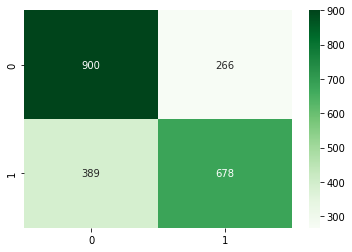

In [31]:
from sklearn.metrics import confusion_matrix

print("confusion_matrix:", confusion_matrix(y_test, pred))

LR_cmatrix = confusion_matrix(y_test, pred)
sns.heatmap(LR_cmatrix, annot=True, cmap = 'Greens', fmt='g')

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
RF_pred = RF.predict(X_test)
RF_pred

array([1, 0, 0, ..., 0, 1, 1])

In [35]:
rf_predictions = pd.DataFrame(RF_pred)
rf_predictions.head()

,0
0,1
1,0
2,0
3,0
4,0


In [36]:
# Accuracy
print("rf_Accuracy:", accuracy_score(y_test, RF_pred))

# Precision
print("rf_Precision:", precision_score(y_test, RF_pred))

# Recall
print("rf_Recall:", recall_score(y_test, RF_pred))

# F1
print("rf_F1:", f1_score(y_test, RF_pred))

rf_Accuracy: 0.7241379310344828
rf_Precision: 0.7497231450719822
rf_Recall: 0.6344892221180881
rf_F1: 0.6873096446700507


Confusion_matrix: [[940 226]
 [390 677]]


<AxesSubplot:>

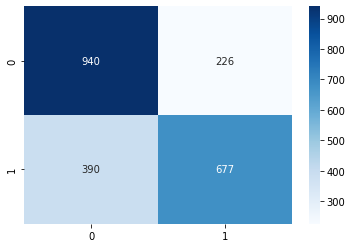

In [37]:
# Confusion matrix
print("Confusion_matrix:", confusion_matrix(y_test, RF_pred))

RF_cmatrix = confusion_matrix(y_test, RF_pred)
sns.heatmap(RF_cmatrix, annot=True, cmap= 'Blues', fmt='g')

### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
DT_pred = DT.predict(X_test)
DT_pred

array([0, 0, 1, ..., 0, 1, 0])

In [40]:
dt_predictions = pd.DataFrame(DT_pred)
dt_predictions.head()

,0
0,0
1,0
2,1
3,1
4,0


In [41]:
# Accuracy
print("dt_Accuracy:", accuracy_score(y_test, DT_pred))

# Precision
print("dt_Precision:", precision_score(y_test, DT_pred))

# Recall
print("dt_Recall:", recall_score(y_test, DT_pred))

# F1
print("dt_F1:", f1_score(y_test, DT_pred))

dt_Accuracy: 0.6560680698611733
dt_Precision: 0.6380424746075716
dt_Recall: 0.647610121836926
dt_F1: 0.6427906976744187


confusion_matrix: [[774 392]
 [376 691]]


<AxesSubplot:>

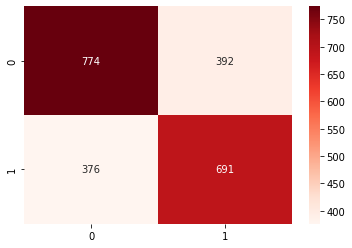

In [42]:
# Confusion matrix
print("confusion_matrix:", confusion_matrix(y_test, DT_pred))

DT_cmatrix = confusion_matrix(y_test, DT_pred)
sns.heatmap(DT_cmatrix, annot=True, cmap= 'Reds', fmt='g')

In [90]:
#from sklearn import tree

#DT = DecisionTreeClassifier(max_depth = 4)
#DT.fit(X_train, y_train)
#DT_pred = DT.predict(X_test)

#fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,8), dpi = 250)

#tree.plot_tree(DT, feature_names = X_train.columns, class_names = ["yes", "no"], filled = True, fontsize = 5.5)

#plt.show()

### Which Algorithm is better?

**Random forest** shows better performance compared to Logistic regression and Decision tree